## Example source notebook
This notebook is an example workflow that shows how the [scrapbook](https://nteract-scrapbook.readthedocs.io/) library from [nteract](https://nteract.io) could be used in a workflow. This notebook is self contained to limit the dependencies, but will demonstrate the persistence of various objects, including visual objects. This notebook is also parameterized so that it could be run via [papermill](https://papermill.readthedocs.io/). 

In [1]:
length = 1000
symbol = "XYZ"
d = {
    "a": 1,
    "b": 2,
}
threshold = 0.10 # 10%

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# generate a DataFrame that has synthetic price information
idx = pd.date_range(start='20100101', periods=length, freq='B')
prices = pd.DataFrame({'price' : np.cumsum(np.random.random(length) - .5)}, index=idx)
# normalize to always be above 0
prices['price'] += abs(prices['price'].min())
prices['ATH'] = prices['price'].expanding().max()

In [4]:
distance = 1 - prices.iloc[-1]['price']/prices.iloc[-1]['ATH']
if distance <= threshold:
    close_to_ath = True
else:
    close_to_ath = False

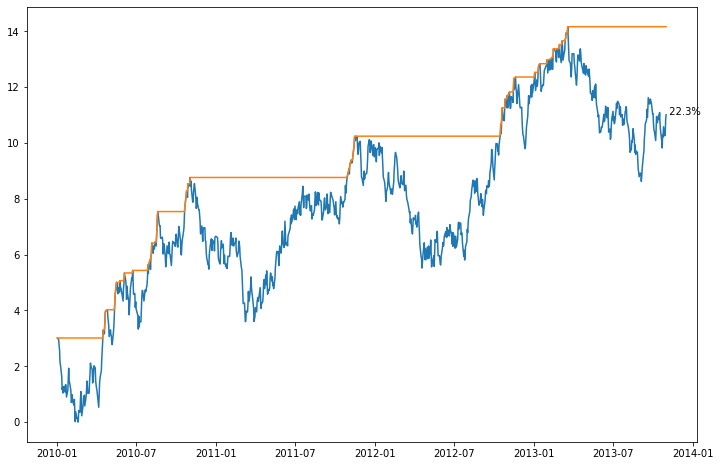

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(prices['price'])
ax.plot(prices['ATH'])
ax.text(prices.index[-1], prices['price'].iloc[-1], f"{distance * 100: .1f}%");

This is a trivial example using synthetic data, in a real situation we'd pull data from an actual data source. But often we will want to build notebooks that operate on one single part of a problem, and then later on aggregate data from multiple notebooks in another notebook. What would be helpful is to be able to easily persist the results of the notebook execution, including data used in the calculation or even visual elements, and then use them later. This is what scrapbook does.

In [6]:
import scrapbook as sb

The main functionality in scrapbook is to store data (using the ```glue``` method) and later access the data (using ```scraps```) in another notebook. The data is stored in the notebook file itself (more on this later). There are optional arguments to specify the encoder that write the data and whether the display value is stored and shown as well. In a jupyter notebook, if you pass a variable into ```display``` or place it as the last line in a cell and execute it, the display result is what you see. 

For basic types, the glue method determine the encoder based on the value passed in.

In [7]:
sb.glue("length", length)                           # numeric - int (stored as json)
sb.glue("symbol", symbol)                           # text
sb.glue("d", d)                                     # dictionary
sb.glue("length_displayed", length, display=True)   # numeric, but display the value as well
sb.glue("distance", distance)                       # numeric - float
sb.glue("close_to_ath", close_to_ath)               # bool

1000

You can also specify the encoder for more complex types. At this time (as of version ```0.5``` of scrapbook), there are encoders included for ```json```, ```pandas```, and ```text```, and ```display```.

In [8]:
sb.glue("dj", d, encoder="json")
sb.glue("prices", prices, encoder="pandas")
sb.glue("message", "This is a message", encoder="text")

The ```display``` encoder will only save the displayed value, not the underlying data that backs it. This might make sense for visual types that can have a lot of data needed to create the result, but where you only want the visual result, not the data. For example, if we only wanted our plot from above, we could persist just the display.  We don't have an encoder that will save a ```matplotlib.figure.Figure```, but since it can be displayed, it can be stored that way.

Scrap of type <class 'matplotlib.figure.Figure'> has no supported encoder registered


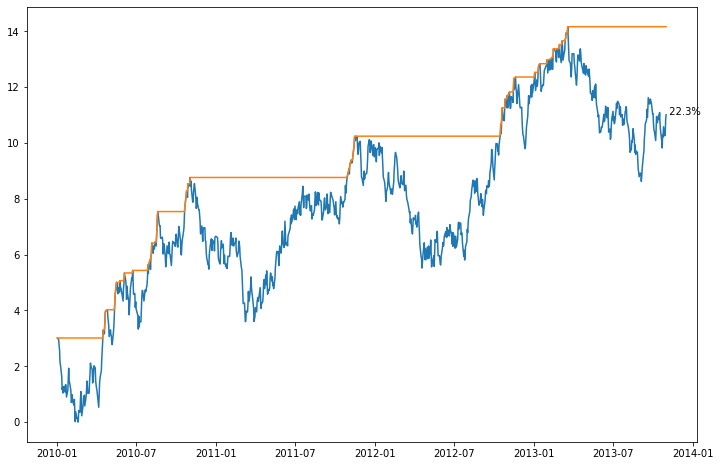

In [9]:
try:
    sb.glue("chart", fig)
except NotImplementedError as nie:
    print(nie)
# but we can store the display result
sb.glue("chart", fig, encoder="display")

At this point, we need to move to the [next notebook](https://github.com/wrighter/python_blogposts/tree/main/tools/scrapbook_example_dest.ipynb) to retrieve the values out of this notebook. This notebook needs to be saved first, either manually, or using a tool like [papermill](https://www.wrighters.io/parameters-jupyter-notebooks-with-papermill/) to execute the entire notebook and save it. If you have changed values in the notebook and re-executed it, save it now.